---
***Plan:***  


*   Installation et chargement des librairies.
*   Constitution d’un benchmark de données Tweets à partir de Twitter.
*   Pré-traitement du benchmark.
*   Embedding: TF-IDF, Word2Vec, GloVe, Fastext et Bert/Albert OU Camembert/Flaubert.
*   Choix du nombre de topics.
*   Utilisation des approches de “Topics modeling” (LDA, NMF, BTM, coclustering). 


---

#**Install & Libraries** 

In [ ]:
!pip install emoji --upgrade
!pip install tqdm
!pip install scikit-learn-extra
!pip install rpy2
!pip install umap-learn
!pip install nltk
!pip install umap-learn
!pip install transformers
!pip install hdbscan
!pip install --upgrade xlrd
!pip install omegaconf
!pip install fairseq
!pip install sentencepiece
!pip install utils
!pip install pyLDAvis
!pip install coclust
!pip install biterm
!pip install vaderSentiment
!pip install --use-deprecated=legacy-resolver pycaret[full]

     |████████████████████████████████| 175 kB 4.9 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=d9e7ecc224d3d8624d144649c30df422f0fa8a67521b0f8584f19dbac27ee62d
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 1.7 MB 5.6 MB/s 
     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 10.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=2490bc1557958f0c3fa2be9ff60a4adaa40b2bda0dc6870844d54c9f1f061dfb
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=e314dcc44310fd6e5abaf0b29cda1f90461472b79c4f2ea9a478615aa4855cbf
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 147 kB 35.5 MB/s 
     |████████████████████████████████| 90 kB 8.3 MB/s 
  Attempting uninstall: importlib-resources
    Found existing installation: importlib-resources 5.7.1
    Uninstalling importlib-resources-5.7.1:
      Successfully uninstalled importlib-resources-5.7.1
     |████████████████████████████████| 1.2 MB 5.4 MB/s 
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5bad2246003b74bf7127a7a3534d99fbd92e47996ebf69ff088e6222ed34572d
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Created wheel for coclust: filename=coclust-0.

In [ ]:
!pip install markupsafe

In [ ]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import hdbscan
from sklearn_extra.cluster import KMedoids
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering as CAH

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors
import warnings
import requests
import re
import gensim.models
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import warnings
from six.moves import urllib
import seaborn as sns

import os
import math
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.cluster import KMeans
from tqdm import tqdm
#from umap import UMAP
from sklearn.manifold import TSNE

from tqdm import tqdm
from torch.utils.data import DataLoader
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

import nltk
from nltk import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

import torch
from transformers import BertModel, BertTokenizer, RobertaModel, RobertaTokenizer
from torch.utils.data import DataLoader
import emoji

import torch
import seaborn
import pandas as pd
from sklearn import metrics
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import CamembertForSequenceClassification, CamembertModel, CamembertTokenizer, AdamW
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import NMF
from gensim.models import LdaMulticore
from sklearn.decomposition import LatentDirichletAllocation

import numpy as np
from biterm.btm import oBTM 
from sklearn.feature_extraction.text import CountVectorizer
from biterm.utility import vec_to_biterms, topic_summuary
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from sklearn.decomposition import PCA
import tensorflow_hub as hub
#from pycaret.classification import * 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
#from googletrans import Translator
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale range', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)
import pandas as pd
import pycaret 

from coclust.evaluation.internal import best_modularity_partition
from coclust.coclustering import CoclustMod, CoclustSpecMod
from scipy.sparse import coo_matrix
from coclust.visualization import plot_max_modularities, plot_cluster_top_terms,plot_cluster_sizes, plot_cluster_top_terms, get_term_graph, plot_convergence


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#**Functions**    

In [ ]:
def vectorize(list_of_docs, model):
    features = []
    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [ ]:
def collate_fn(batch_sentences, tokenizer):
    tokenized = tokenizer(batch_sentences, padding=True, truncation=True, max_length=512)
    inds = tokenized['input_ids']
    mask = tokenized['attention_mask']

    inds = torch.tensor(inds)
    mask = torch.tensor(mask)

    return inds, mask
    
def encode_sentences_batch(model, tokenizer, sentences, batch_size=32):
    n_layers = model.config.num_hidden_layers
    tokenized_sentences = [tokenizer.tokenize(sent)[:512] for sent in sentences]
    
    # sort by length
    argsort = np.argsort([len(i) for i in tokenized_sentences])
    sorted_inds = np.argsort(argsort)

    sentences = [sentences[i] for i in argsort]

    # sentences_dataset = BertDataset(sentences)
    data_loader = DataLoader(dataset=sentences,
                                batch_size=batch_size,
                                shuffle=False,
                                num_workers=4,
                                collate_fn=lambda x: collate_fn(x, tokenizer)
                                )

    embeddings = {k:[] for k in range(n_layers)}

    for _, batch in enumerate(data_loader):
        with torch.no_grad():
            x, mask = batch
            x = x.to(device)

            output = model(x)
            hidden_states = output.hidden_states
            hidden_states = list(hidden_states[1:])

            for ind_layer, layer_embeddings in enumerate(hidden_states):
                # remove padding's zeros
                layer_embeddings = layer_embeddings.cpu() * mask[:, :, None]
                # compute average over tokens
                layer_hidden_state = layer_embeddings.mean(axis=1)

                embeddings[ind_layer].append(layer_hidden_state)

    # put the batches together and sort the documents
    embeddings = [torch.vstack(embeddings[layer_ind])[sorted_inds].numpy() for layer_ind in range(n_layers)]
    
    return embeddings

def encode_sentence(model, tokenizer, sentence):
  # Tokenisation
  tokenized = tokenizer.tokenize(sentence)[:512]
  input_ids = tokenizer.convert_tokens_to_ids(tokenized)

  # Tensor creation
  tensor_sentence = torch.tensor([input_ids])
  tensor_sentence = tensor_sentence.to(device)

  # Compute BERT representations
  output = model(tensor_sentence)
  hidden_states = output.hidden_states
  hidden_states = hidden_states[1:]

  # Compute document embedding
  word_embeddings = [layer_embeddings[0].detach().cpu().numpy() for layer_embeddings in hidden_states]
  document_embedding = [layer_word_embedding.mean(axis=0) for layer_word_embedding in word_embeddings]

  return (document_embedding)

In [ ]:
def static_document_embeddings(word_embedding_func, docs, tokenizer, n_dims=300):
    doc_vectors = []
    for doc in docs:
        doc = tokenizer(doc)
        word_vectors = []
        for word in doc:
            vector = word_embedding_func(word)
            if vector is not None:
                word_vectors.append(vector)
        if word_vectors:
            doc_vector = np.array(word_vectors).mean(axis=0)
        else:
            warnings.warn("Zeros returned. Words not in vocabulary \"{}\"".format(doc), Warning)
            doc_vector = np.array([0] * n_dims)
        
        doc_vectors.append(doc_vector)
    return np.array(doc_vectors)

def tokenize_re(text, min_len=2):
    tokens = token_pattern.findall(text)
    return [x for x in tokens if len(x) >= min_len]

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

def eval_clustering_2D_nlp(x_reduced,labels):
    f, ax = plt.subplots( figsize=(14, 6))
    ax.scatter(x_reduced[:,0], x_reduced[ :,1], c =labels)
    ax.set_title('visualisation des predictions')
    slh = silhouette_score(x_reduced,labels)
    plt.suptitle(slh)

#**Data Loading, Preprocessing and Analysis**

## *Load dataset*

In [ ]:
true_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

true_data['Target']=['True']*len(true_data)
fake_data['Target']=['Fake']*len(fake_data)
data=true_data.append(fake_data).sample(frac=1).reset_index().drop(columns=['index'])

In [ ]:
data.head(5)

,title,text,subject,date,Target
0,"Racist Prick Spits On Black Pair, Yells N****...","Are we a post-racial nation? No, we re not, no...",News,"June 2, 2016",Fake
1,WOW! STARBUCKS CEO JUST ACCUSED Whites Of Comm...,Thousands of Starbucks customers cut up their ...,politics,"Aug 20, 2017",Fake
2,Funeral of slain Malta blogger hears warning t...,VALLETTA (Reuters) - Thousands of mourners at ...,worldnews,"November 3, 2017",True
3,"Trump, Norwegian PM Solberg speak by phone: Tr...",(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 2, 2016",True
4,California Attorney General Harris says not in...,WASHINGTON (Reuters) - California Attorney Gen...,politicsNews,"February 17, 2016",True


In [ ]:
data.shape

(44898, 5)

In [ ]:
temp=data.sample(n=5000, random_state=1234)
temp.shape

(5000, 5)

In [ ]:
#nb de topic
temp=data.sample(n=5000, random_state=1234)
len(pd.unique(data['subject']))

8

In [ ]:
data=temp

In [ ]:
len(pd.unique(temp['subject']))

8

## *Prepocessing*

In [ ]:
punctuation = r'''!()-[]{};:'"\,<>./?@#%^&*_”‘’“'''
stop_words = nltk.corpus.stopwords.words("english")

In [ ]:
def clean_text(text, punctuation, stop_words): 
    
    #text = re.sub('[^a-zA-Z]',' ', text)

    # suppression des chiffres
    text = re.sub(r'[0-9]+','', text)

    #suppression des emojis
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])


    # suppression des URLS 
    text = re.sub(r'https?://\S+|www\.\S+','',text) # suppression des liens HTTP
    text = re.sub(r'bit.ly/\S+', '', text)  # suppression des liens bitly 
    text = text.strip('[link]')   # suppression des [links]
    text = re.sub(r'pic.twitter\S+','', text)
    
    # suppression des users
    text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', text)  # suppression des tweeted at
    text = re.sub('rt ', '', text) # suppression des re-tweet
    

    # suppression hastags
    text = re.sub(r'#\w+', ' ', text)

    # suppression des tags html
    text = re.sub(r'<.*?>','',text)


    # suppression des espaces en trop
    text = text.strip() #text = re.sub(r'\s+', ' ', text).strip()

    # mise en minuscule 
    text = text.lower()

    # suppression de la ponctuation
    for x in text:
        if x in punctuation:
            text=text.replace(x," ") 

    # tokenisation (pour la suite du preprocessing)
    text= nltk.word_tokenize(text)

    # suppression des stop words
    text = [word for word in text if word not in stop_words]
    #string = ' '.join([word for word in string.split() if word not in stop_words])
    
    # lemmatizer
    lemmatizer = WordNetLemmatizer()
    stringL = [x for x in text if x.isalpha()]
    stringLema = [lemmatizer.lemmatize(x) for x in stringL]
     
    # reconvertir en String
    text = ' '.join(stringLema) 
    return text

In [ ]:
df['cleaned_tweets']=df['original_tweets'].apply(lambda x: clean_text(x, punctuation, stop_words))
df

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/output_bis.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

Mounted at /content/drive


## *Visualization*

In [ ]:
df=pd.read_csv("preprocess_5000.csv")

In [ ]:
nbWords_origin = len(list(set(" ".join(df['original_tweets']).lower().split(" "))))
nbWords_preprocess = len(list(set(" ".join(df['cleaned_tweets']).lower().split(" "))))

print("On avait: "+str(nbWords_origin)+" mots différents avant prétraitement de nos données textuelles.")
print("Il reste: "+str(nbWords_preprocess)+" mots différents après prétraitement de nos données textuelles.")

On avait: 107307 mots différents avant prétraitement de nos données textuelles.
Il reste: 40052 mots différents après prétraitement de nos données textuelles.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


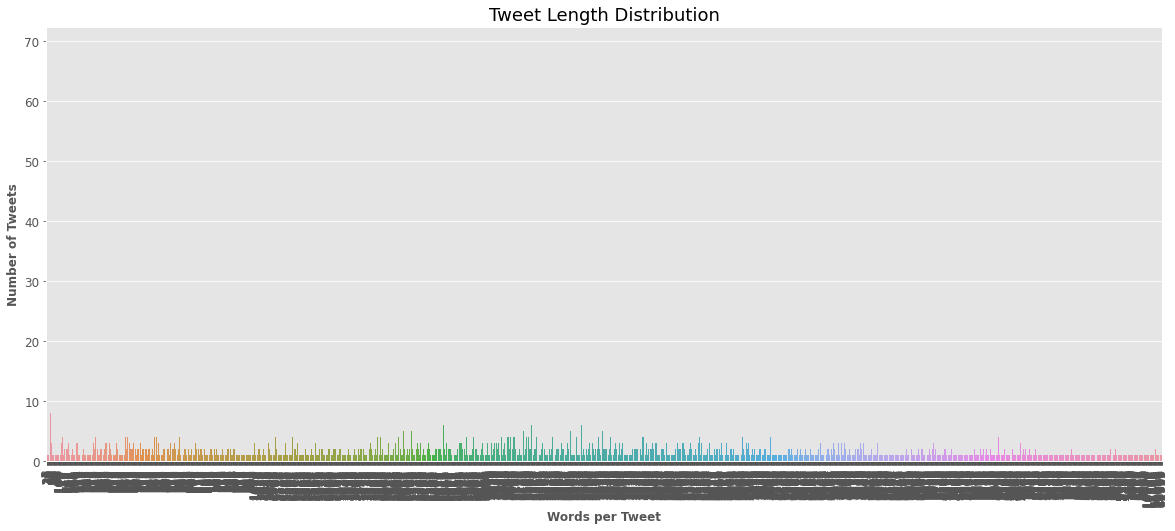

In [ ]:
# distribution de la longueur des tweets

tweet_lengths = [len(d) for d in df.original_tweets]
plt.figure(figsize = (20,8))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.xticks(rotation=90)
plt.show()

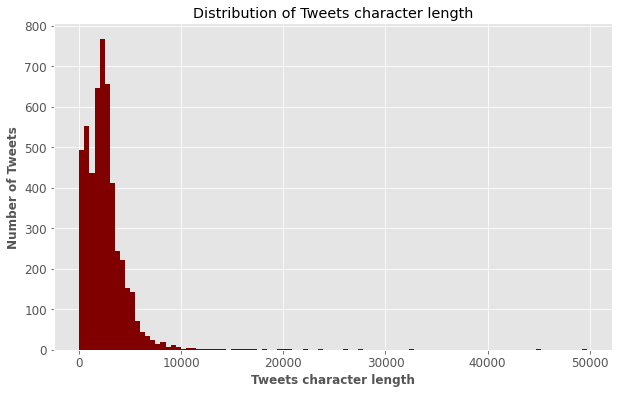

In [ ]:
# distribution de la longueur des tweets

%matplotlib inline

plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df.original_tweets]
plt.hist(doc_lens, bins = 100, color="maroon")
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

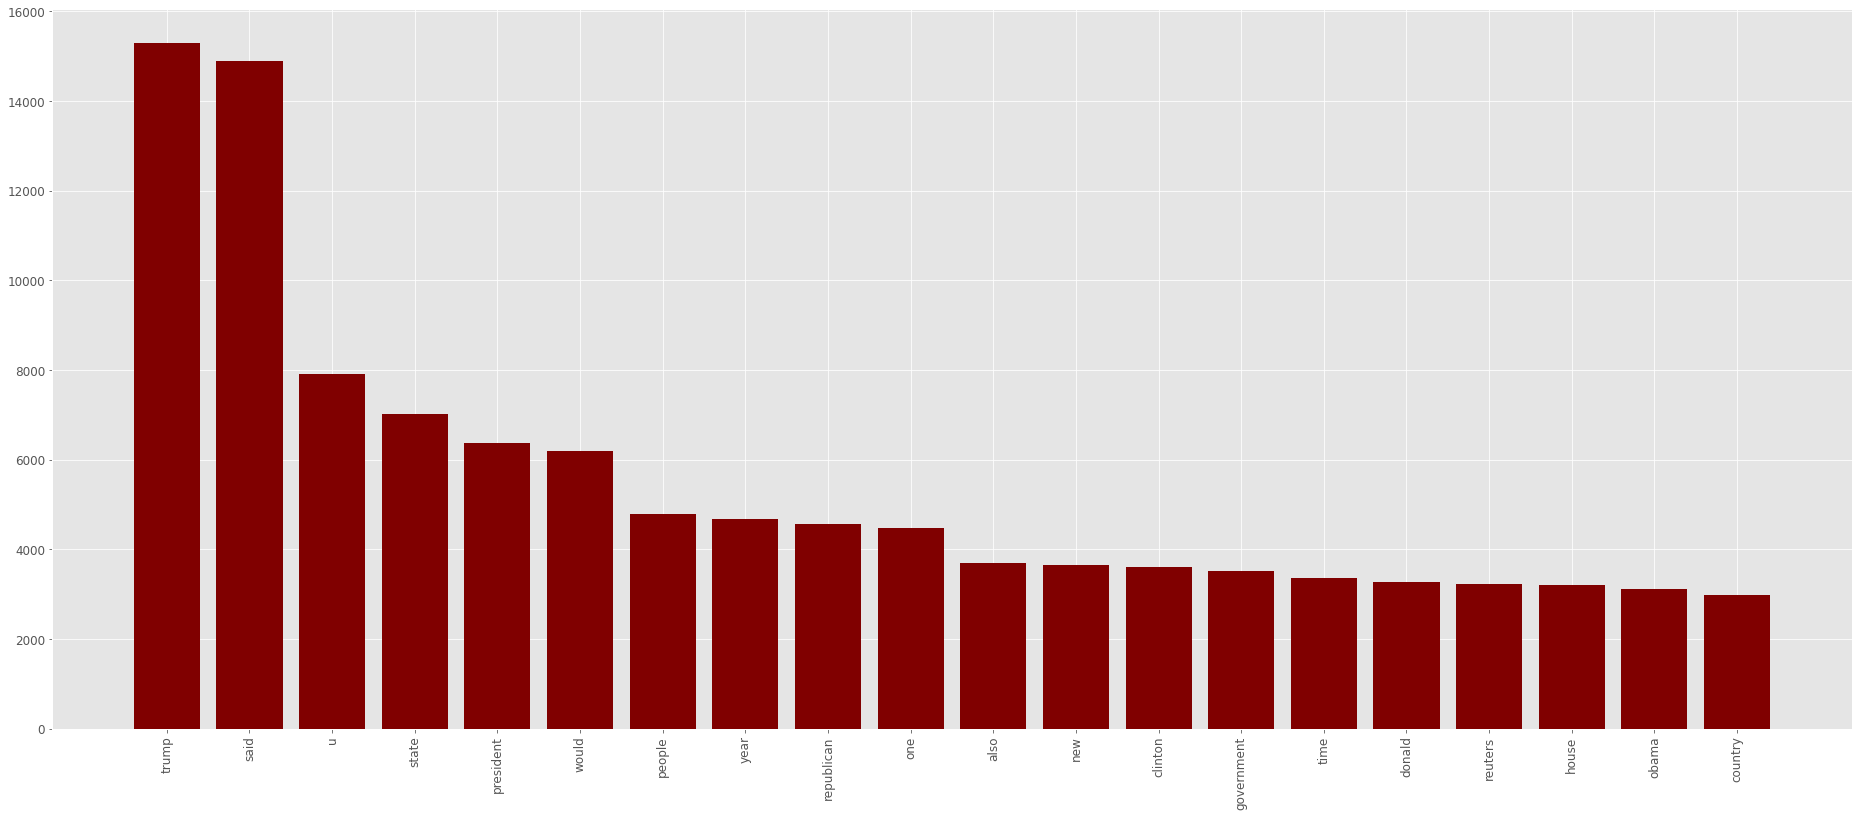

In [ ]:
# affichage des mots qui apparaissent le plus

dic_word={}
for words in df["cleaned_tweets"]:
    for word in words.split():
        if word in dic_word:
            dic_word[word]=dic_word[word]+1
        else:
            dic_word[word]=1

dic_word=dict(sorted(dic_word.items(), key=lambda item: item[1], reverse=True))

fig = plt.figure(figsize = (25, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(list(dic_word.keys())[:20],list(dic_word.values())[:20], color="maroon")
plt.xticks(rotation=90)
plt.show()

In [ ]:
dic = {n:[k for k in dic_word.keys() if dic_word[k] == n] for n in set(dic_word.values())}

dicb=dict(sorted(dic.items(), key=lambda item: item[0], reverse=False))

for k,v in dicb.items():
    print(k,v)

1 ['faxing', 'accredited', 'accreditation', 'bureaudoes', 'overslept', 'booze', 'swilled', 'nothin', 'mersin', 'provisionally', 'dekalb', 'malfunctioned', 'unbeaten', 'wetsuit', 'robemaheu', 'trafficante', 'roselli', 'bayer', 'aspirin', 'libre', 'paddled', 'ingenious', 'diver', 'whereupon', 'impracticality', 'lacing', 'marita', 'sturgis', 'bardoch', 'unmix', 'belarussian', 'sukhna', 'deseand', 'husaini', 'zaman', 'dasht', 'barchi', 'ghor', 'balkh', 'atta', 'noor', 'schneier', 'growed', 'etowah', 'fixin', 'votin', 'statementposted', 'repoblaming', 'reposubmitted', 'repodoes', 'rabu', 'fredrich', 'mri', 'splashed', 'spoutility', 'diansyah', 'liaise', 'inews', 'jusuf', 'kalla', 'rollouts', 'unguided', 'smamunitions', 'hellfire', 'pious', 'yesh', 'atid', 'naor', 'knesset', 'deri', 'shas', 'merah', 'pascal', 'gastineau', 'mel', 'gambian', 'sweetheamining', 'misspending', 'fleurette', 'repodenying', 'junglers', 'innermost', 'deboutte', 'goebbels', 'nieuwsuur', 'comie', 'forensicator', 'metad

In [ ]:
# unigram

def get_top_n_words(corpus, n=None):
  vec = CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_words(df.cleaned_tweets, 10)
unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
unigram

,unigram,count
0,trump,15299
1,said,14887
2,state,7015
3,president,6381
4,people,4779
5,year,4683
6,republican,4560
7,new,3645
8,clinton,3611
9,government,3510


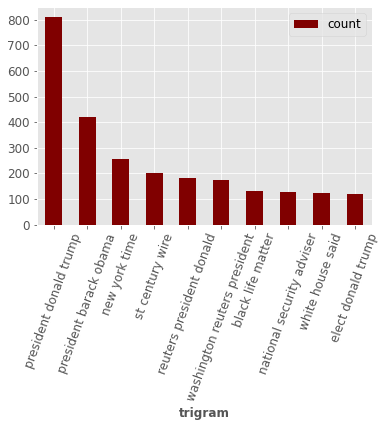

In [ ]:
# trigram

def get_top_n_trigram(corpus, n=None):
  vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in      vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_trigram(df.cleaned_tweets, 10)
trigram = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
trigram.plot.bar(x="trigram", y="count", rot=70, color="maroon")

(-0.5, 399.5, 199.5, -0.5)

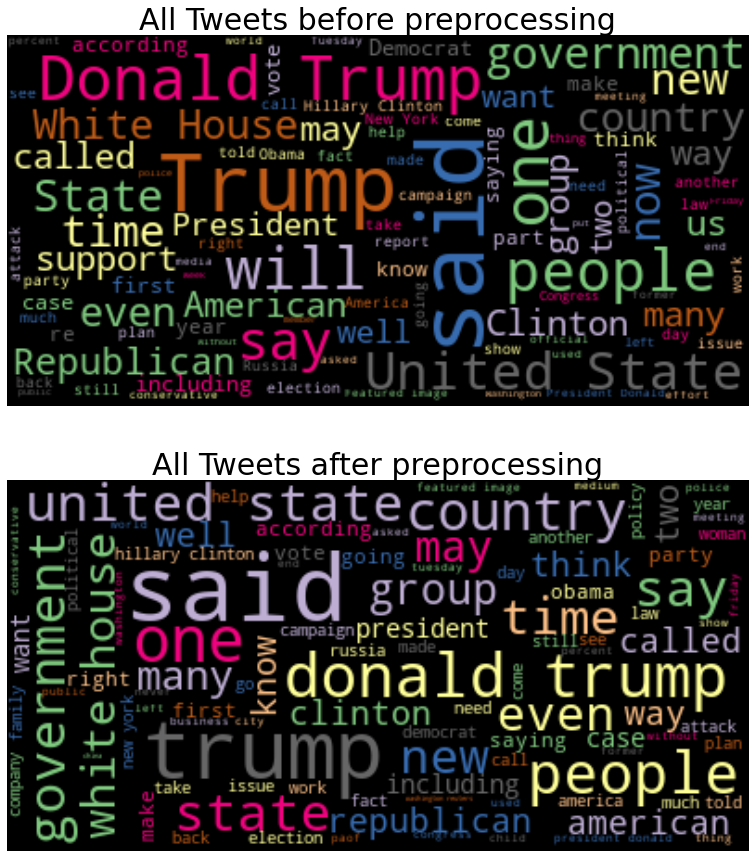

In [ ]:
#word cloud

tweets_original = " ".join(review for review in df.original_tweets)
tweets_cleaned = " ".join(review for review in df.cleaned_tweets)

fig, ax = plt.subplots(2, 1, figsize  = (15,15))

wordcloud_original = WordCloud(max_font_size=50, max_words=100, colormap = 'Accent', background_color = 'black').generate(tweets_original)
wordcloud_cleaned= WordCloud(max_font_size=50, max_words=100, colormap = 'Accent', background_color = 'black').generate(tweets_cleaned)

# Display the generated image:
ax[0].imshow(wordcloud_original, interpolation='bilinear')
ax[0].set_title('All Tweets before preprocessing', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_cleaned, interpolation='bilinear')
ax[1].set_title('All Tweets after preprocessing', fontsize=30)
ax[1].axis('off')

# **Data Embedding**

## Ne pas executer

In [ ]:
df1 = pd.read_csv('preprocess_5000.csv')
df1.dropna(subset = ["cleaned_tweets"], inplace=True)
df1['cleaned_tweets'] = df1['cleaned_tweets'].astype(str)
df1=df1.drop(columns=['Unnamed: 0'])
df1.shape

(4926, 2)

In [ ]:
#df est notre dataset, on garde que ce qui nous interesse et mise au format du code
df2=data.drop(columns=['date', 'title', 'subject'])
df2.columns = ['original_tweets', 'Target']
df2.shape

(44898, 2)

In [ ]:
toto=pd.merge(df1, df2, on='original_tweets')

In [ ]:
data=toto.drop_duplicates()
data.shape

(4852, 3)

In [ ]:
df=data.sample(n=1000, random_state=1234)

In [ ]:
df

,original_tweets,cleaned_tweets,Target
6197,LONDON (Reuters) - Britain and France are firm...,london reuters britain france firmly committed...,True
1139,Donald Trump has been called out by yet anothe...,donald trump called yet another foreign leader...,Fake
5817,"President Obama visited Jakarta, where the nor...",president obama visited jakarta normally staid...,Fake
2074,"NATIONAL HARBOR, Md./WASHINGTON (Reuters) - Pr...",national harbor md washington reuters presiden...,True
5845,"YE BAW KYA, Myanmar (Reuters) - Myanmar author...",ye baw kya myanmar reuters myanmar authority d...,True
...,...,...,...
2058,21st Century Wire says One thing is certain ab...,st century wire say one thing certain war syri...,Fake
3453,"Monica Crowley, conservative radio host, Fox N...",monica crowley conservative radio host fox new...,Fake
3913,HARARE (Reuters) - Zimbabwe s President Robert...,harare reuters zimbabwe president robemugabe c...,True
2803,"Back in July, 21WIRE detailed the investigativ...",back july wire detailed investigative work bul...,Fake


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/dataset_final.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

Mounted at /content/drive


## Commencer ici

In [ ]:
df = pd.read_csv('dataset_final.csv')
df.dropna(subset = ["cleaned_tweets"], inplace=True)
df['cleaned_tweets'] = df['cleaned_tweets'].astype(str)
df=df.drop(columns=['Unnamed: 0', 'Target'])

In [ ]:
#corpus=[x.split() for x in df["cleaned_tweets"]]
corpus_bis=[x for x in df["cleaned_tweets"]]

## **Bag of Words**

In [ ]:
vectorizer = CountVectorizer(
  analyzer='word',       
  min_df=3,# minimum required occurences of a word 
  stop_words='english',# remove stop words
  lowercase=True,# convert all words to lowercase
  token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
  max_features=5000,# max number of unique words
                            )
embedding_bow = vectorizer.fit_transform(df["cleaned_tweets"])

In [ ]:
words = vectorizer.get_feature_names()

In [ ]:
words

## **TF IDF**

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus_bis)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
embedding_tfidf = pd.DataFrame(denselist, columns=feature_names)

##**Bert** 

In [ ]:
if torch.cuda.is_available():
  device = "cuda"
else:
  device = 'cpu'

torch.cuda.is_available()

model_name = 'bert-base-cased'
model = BertModel.from_pretrained(model_name, output_hidden_states = True)
tokenizer = BertTokenizer.from_pretrained(model_name)

if device == "cuda":
  model.cuda()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [ ]:
encoded_sentences = []

for sentence in df["cleaned_tweets"]:
  document_embeddings = encode_sentence(model, tokenizer, sentence)
  document_embeddings = np.vstack(document_embeddings)
  encoded_sentences.append(document_embeddings)

concat_embeddings = np.array(encoded_sentences)
print(concat_embeddings.shape)
final_embeddings = np.swapaxes(concat_embeddings, 0, 1)
print(final_embeddings.shape)
matrices = list(final_embeddings)
print(len(matrices))
print(matrices[0].shape)
embedding_bert = np.concatenate(matrices, axis=1)
print(embedding_bert.shape)

(1000, 12, 768)
(12, 1000, 768)
12
(1000, 768)
(1000, 9216)


In [ ]:
embedding_bert

array([[-0.20996134,  0.1917197 , -0.09351262, ..., -0.942219  ,
        -0.15519124,  0.18113133],
       [ 0.07903398, -0.00634734, -0.16950843, ..., -0.57578284,
        -0.2692006 ,  0.32017383],
       [ 0.18939878, -0.09326324, -0.37265417, ..., -0.78491724,
        -0.07575656,  0.41083357],
       ...,
       [-0.30282342, -0.03686903, -0.15470102, ..., -0.77719873,
        -0.11014847,  0.40519744],
       [ 0.02199395,  0.19534421, -0.27273938, ..., -0.8475365 ,
        -0.10281131,  0.420053  ],
       [-0.0207056 , -0.07058749, -0.257059  , ..., -0.6805069 ,
         0.05689212,  0.09650711]], dtype=float32)

# **Choix du nombre de Topics**

In [ ]:
def elbow(embedding, max_k):
  inertia = []
  K_range = range(1,max_k)
  for k in K_range:
    model = KMeans(n_clusters=k).fit(embedding)
    #model = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=0)
    inertia.append(model.inertia_)
  plt.plot(K_range, inertia)
  plt.xlabel('Nombre de clusters')
  plt.ylabel('Coût du modele')
  plt.figure(figsize=(500, 200), dpi=80)

In [ ]:
elbow(embedding_tfidf,10)

In [ ]:
elbow(embedding_tfidf,9)

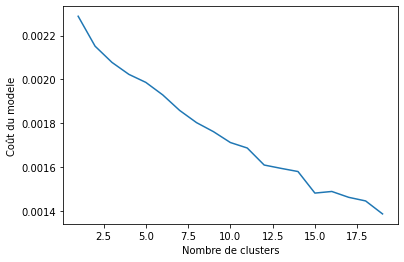

<Figure size 40000x16000 with 0 Axes>

In [ ]:
elbow(embedding_word2vec_cbow,20)

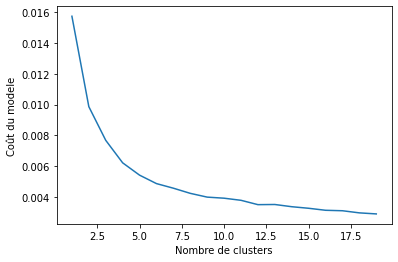

<Figure size 40000x16000 with 0 Axes>

In [ ]:
elbow(embedding_word2vec_skip,20)

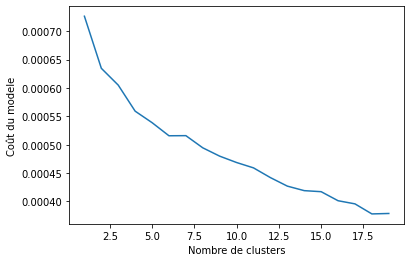

<Figure size 40000x16000 with 0 Axes>

In [ ]:
elbow(embedding_fasttext_cbow,20)

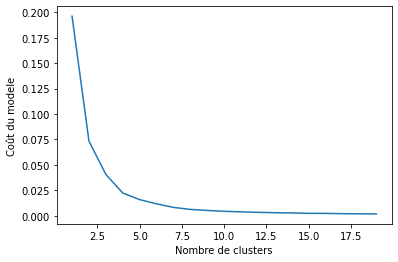

<Figure size 40000x16000 with 0 Axes>

In [ ]:
elbow(embedding_fasttext_skip,20)

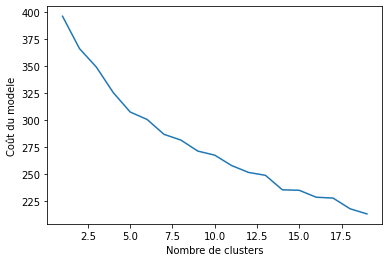

<Figure size 40000x16000 with 0 Axes>

In [ ]:
elbow(embedding_glove,20)

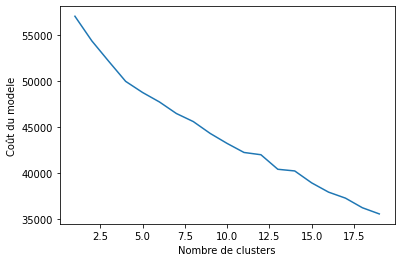

<Figure size 40000x16000 with 0 Axes>

In [ ]:
elbow(embedding_bert,20)

# **Topic Modelling**

## **Bag of Words**

In [ ]:
data_matrix = embedding_bow

### ***LDA***

In [ ]:
number_of_topics = 6

lda_model = LatentDirichletAllocation( n_components=number_of_topics, 
                                      learning_method='online', 
                                      random_state=20,  
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_matrix)

pyLDAvis is used to interpret the topics that has been fit to a corpus of tweets data.   
The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

In [ ]:
for i,topic in enumerate(lda_model.components_):
  print(f'Top 10 words for topic #{i+1}:')
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
  print('\n')

Top 10 words for topic #1:
['state', 'election', 'turkey', 'syrian', 'said', 'moscow', 'syria', 'putin', 'russian', 'russia']


Top 10 words for topic #2:
['total', 'game', 'brazil', 'country', 'song', 'national', 'player', 'anthem', 'case', 'zika']


Top 10 words for topic #3:
['percent', 'trump', 'county', 'party', 'clinton', 'said', 'state', 'election', 'vote', 'republican']


Top 10 words for topic #4:
['time', 'say', 'image', 'woman', 'donald', 'president', 'like', 'said', 'people', 'trump']


Top 10 words for topic #5:
['north', 'people', 'president', 'country', 'government', 'united', 'reuters', 'year', 'state', 'said']


Top 10 words for topic #6:
['donald', 'washington', 'state', 'republican', 'clinton', 'tax', 'house', 'president', 'said', 'trump']




In [ ]:
topic_values = lda_model.transform(data_matrix)
df1=df.copy()
df1['Topic'] = topic_values.argmax(axis=1)
df1

,original_tweets,cleaned_tweets,Topic
0,LONDON (Reuters) - Britain and France are firm...,london reuters britain france firmly committed...,4
1,Donald Trump has been called out by yet anothe...,donald trump called yet another foreign leader...,3
2,"President Obama visited Jakarta, where the nor...",president obama visited jakarta normally staid...,3
3,"NATIONAL HARBOR, Md./WASHINGTON (Reuters) - Pr...",national harbor md washington reuters presiden...,5
4,"YE BAW KYA, Myanmar (Reuters) - Myanmar author...",ye baw kya myanmar reuters myanmar authority d...,4
...,...,...,...
995,21st Century Wire says One thing is certain ab...,st century wire say one thing certain war syri...,4
996,"Monica Crowley, conservative radio host, Fox N...",monica crowley conservative radio host fox new...,3
997,HARARE (Reuters) - Zimbabwe s President Robert...,harare reuters zimbabwe president robemugabe c...,4
998,"Back in July, 21WIRE detailed the investigativ...",back july wire detailed investigative work bul...,4


### ***NMF***

In [ ]:
number_of_topics = 6

model = NMF(n_components=number_of_topics, random_state=5)
output = model.fit(data_matrix)
features = model.transform(data_matrix)

In [ ]:
for i,topic in enumerate(model.components_):
  print(f'Top 10 words for topic #{i+1}:')
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
  print('\n')

Top 10 words for topic #1:
['american', 'image', 'house', 'white', 'campaign', 'said', 'republican', 'president', 'donald', 'trump']


Top 10 words for topic #2:
['government', 'year', 'korea', 'official', 'president', 'north', 'united', 'reuters', 'state', 'said']


Top 10 words for topic #3:
['health', 'add', 'report', 'country', 'outbreak', 'brazil', 'bringing', 'total', 'case', 'zika']


Top 10 words for topic #4:
['angeles', 'los', 'sanctuary', 'franklin', 'santa', 'citizen', 'jefferson', 'san', 'city', 'county']


Top 10 words for topic #5:
['time', 'vote', 'election', 'tax', 'campaign', 'people', 'year', 'state', 'republican', 'clinton']


Top 10 words for topic #6:
['grant', 'prison', 'release', 'district', 'distribute', 'july', 'imprisonment', 'cocaine', 'year', 'sentence']




In [ ]:
topic_values = model.transform(data_matrix)
df2=df.copy()
df2['Topic'] = topic_values.argmax(axis=1)
df2

,original_tweets,cleaned_tweets,Topic
0,LONDON (Reuters) - Britain and France are firm...,london reuters britain france firmly committed...,1
1,Donald Trump has been called out by yet anothe...,donald trump called yet another foreign leader...,0
2,"President Obama visited Jakarta, where the nor...",president obama visited jakarta normally staid...,0
3,"NATIONAL HARBOR, Md./WASHINGTON (Reuters) - Pr...",national harbor md washington reuters presiden...,0
4,"YE BAW KYA, Myanmar (Reuters) - Myanmar author...",ye baw kya myanmar reuters myanmar authority d...,1
...,...,...,...
995,21st Century Wire says One thing is certain ab...,st century wire say one thing certain war syri...,4
996,"Monica Crowley, conservative radio host, Fox N...",monica crowley conservative radio host fox new...,0
997,HARARE (Reuters) - Zimbabwe s President Robert...,harare reuters zimbabwe president robemugabe c...,1
998,"Back in July, 21WIRE detailed the investigativ...",back july wire detailed investigative work bul...,0


### ***BTM***

In [ ]:
vec = CountVectorizer(stop_words='english')
X = vec.fit_transform(df["cleaned_tweets"]).toarray()


vocab = np.array(vec.get_feature_names())
biterms = vec_to_biterms(X)
btm = oBTM(num_topics=20, V=vocab)

print("\n\n Train Online BTM ..")
for i in range(0, len(biterms), 100): # prozess chunk of 200 texts
        biterms_chunk = biterms[i:i + 100]
        btm.fit(biterms_chunk, iterations=50)
topics = btm.transform(biterms)




 Train Online BTM ..


  0%|          | 0/50 [02:51<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
print("\n\n Visualize Topics ..")
pyLDAvis.prepare(btm.phi_wz.T, topics, np.count_nonzero(X, axis=1), vocab, np.sum(X, axis=0))

In [ ]:
print("\n\n Topic coherence ..")
topic_summuary(btm.phi_wz.T, X, vocab, 10)

In [ ]:
df['Topic'] = topics.argmax(axis=1)
df

### ***Coclustering***

In [ ]:
from coclust.evaluation.internal import best_modularity_partition
from coclust.coclustering import CoclustMod, CoclustSpecMod
from scipy.sparse import coo_matrix
from coclust.visualization import plot_max_modularities, plot_cluster_top_terms,plot_cluster_sizes, plot_cluster_top_terms, get_term_graph, plot_convergence


In [ ]:
def random_init(n_clusters, n_cols, random_state=None):
    """Create a random column cluster assignment matrix.
    Each row contains 1 in the column corresponding to the cluster where the
    processed data matrix column belongs, 0 elsewhere.
    Parameters
    ----------
    n_clusters: int
        Number of clusters
    n_cols: int
        Number of columns of the data matrix (i.e. number of rows of the
        matrix returned by this function)
    random_state : int or :class:`numpy.RandomState`, optional
        The generator used to initialize the cluster labels. Defaults to the
        global numpy random number generator.
    Returns
    -------
    matrix
        Matrix of shape (``n_cols``, ``n_clusters``)
    """
    random_state = check_random_state(random_state)
    W_a = random_state.randint(n_clusters, size=n_cols)
    W = np.zeros((n_cols, n_clusters))
    W[np.arange(n_cols), W_a] = 1
    return W
from sklearn.base import BaseEstimator
class BaseDiagonalCoclust(BaseEstimator):
    def get_indices(self, i):
        """Give the row and column indices of the i’th co-cluster.
        Parameters
        ----------
        i : integer
            Index of the co-cluster
        Returns
        -------
        (list, list)
            (row indices, column indices)
        """
        row_indices = [index for index, label in enumerate(self.row_labels_)
                       if label == i]
        column_indices = [index for index, label
                          in enumerate(self.column_labels_) if label == i]
        return (row_indices, column_indices)
    def get_shape(self, i):
        """Give the shape of the i’th co-cluster.
        Parameters
        ----------
        i : integer
            Index of the co-cluster
        Returns
        -------
        (int, int)
            (number of rows, number of columns)
        """
        row_indices, column_indices = self.get_indices(i)
        return (len(row_indices), len(column_indices))
    def get_submatrix(self, m,  i):
        """Give the submatrix corresponding to co-cluster i.
        Parameters
        ----------
        m : X : numpy array or scipy sparse matrix
            Matrix from which the block has to be extracted
        i : integer
           index of the co-cluster
        Returns
        -------
        numpy array or scipy sparse matrix
            Submatrix corresponding to co-cluster i
        """
        row_ind, col_ind = self.get_indices(i)
        row_ind = np.array(row_ind)
        col_ind = np.array(col_ind)
        return m[row_ind[:, np.newaxis], col_ind]
        # -*- coding: utf-8 -*-
"""
The :mod:`coclust.coclustering.coclust_mod` module provides an implementation
of a co-clustering algorithm by direct maximization of graph modularity.
"""
# Author: Francois Role <francois.role@gmail.com>
#         Stanislas Morbieu <stanislas.morbieu@gmail.com>
# License: BSD 3 clause
import numpy as np
from sklearn.utils import check_random_state, check_array
from joblib import Parallel, delayed, effective_n_jobs
#from ..initialization import random_init
#from .base_diagonal_coclust import BaseDiagonalCoclust
def _fit_single(X, n_clusters, random_state, init, max_iter, tol, y=None):
        """Perform one run of co-clustering by direct maximization of graph
        modularity.
        Parameters
        ----------
        X : numpy array or scipy sparse matrix, shape=(n_samples, n_features)
            Matrix to be analyzed
        """
        if init is None:
            W = random_init(n_clusters, X.shape[1], random_state)
        else:
            W = np.matrix(init, dtype=float)
        Z = np.zeros((X.shape[0], n_clusters))
        # Compute the modularity matrix
        row_sums = np.matrix(X.sum(axis=1))
        col_sums = np.matrix(X.sum(axis=0))
        N = float(X.sum())
        indep = (row_sums.dot(col_sums)) / N
        # B is a numpy matrix
        B = X - indep
        modularities = []
        # Loop
        m_begin = float("-inf")
        change = True
        iteration = 0
        while change:
            change = False
            # Reassign rows
            BW = B.dot(W)
            for idx, k in enumerate(np.argmax(BW, axis=1)):
                Z[idx, :] = 0
                Z[idx, k] = 1
            # Reassign columns
            BtZ = (B.T).dot(Z)
            for idx, k in enumerate(np.argmax(BtZ, axis=1)):
                W[idx, :] = 0
                W[idx, k] = 1
            k_times_k = (Z.T).dot(BW)
            m_end = np.trace(k_times_k)
            iteration += 1
            if (np.abs(m_end - m_begin) > tol and
                    iteration < max_iter):
                modularities.append(m_end/N)
                m_begin = m_end
                change = True
        row_labels_ = np.argmax(Z, axis=1).tolist()
        column_labels_ = np.argmax(W, axis=1).tolist()
        modularity = m_end / N
        nb_iterations = iteration
        return row_labels_,  column_labels_, modularity, modularities, nb_iterations
class CoclustMod(BaseDiagonalCoclust):
    """Co-clustering by direct maximization of graph modularity.
    Parameters
    ----------
    n_clusters : int, optional, default: 2
        Number of co-clusters to form
    init : numpy array or scipy sparse matrix, \
        shape (n_features, n_clusters), optional, default: None
        Initial column labels
    max_iter : int, optional, default: 20
        Maximum number of iterations
    n_init : int, optional, default: 1
        Number of time the algorithm will be run with different
        initializations. The final results will be the best output of `n_init`
        consecutive runs in terms of modularity.
    random_state : integer or numpy.RandomState, optional
        The generator used to initialize the centers. If an integer is
        given, it fixes the seed. Defaults to the global numpy random
        number generator.
    tol : float, default: 1e-9
        Relative tolerance with regards to modularity to declare convergence
    Attributes
    ----------
    row_labels_ : array-like, shape (n_rows,)
        Bicluster label of each row
    column_labels_ : array-like, shape (n_cols,)
        Bicluster label of each column
    modularity : float
        Final value of the modularity
    modularities : list
        Record of all computed modularity values for all iterations
    References
    ----------
    * Ailem M., Role F., Nadif M., Co-clustering Document-term Matrices by \
    Direct Maximization of Graph Modularity. CIKM 2015: 1807-1810
    """
    def __init__(self, n_clusters=2, init=None, max_iter=20, n_init=1,
                 tol=1e-9, random_state=None, n_jobs=1):
        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.n_init = n_init
        self.tol = tol
        self.random_state = random_state
        self.n_jobs = n_jobs
        # to remove except for self.modularity = -np.inf!!!
        self.row_labels_ = None
        self.column_labels_ = None
        self.modularity = -np.inf
        self.modularities = []
    def fit(self, X, y=None):
        """Perform co-clustering by direct maximization of graph modularity.
        Parameters
        ----------
        X : numpy array or scipy sparse matrix, shape=(n_samples, n_features)
            Matrix to be analyzed
        """
        random_state = check_random_state(self.random_state)
        check_array(X, accept_sparse=True, dtype="numeric", order=None,
                    copy=False, force_all_finite=True, ensure_2d=True,
                    allow_nd=False, ensure_min_samples=self.n_clusters,
                    ensure_min_features=self.n_clusters, estimator=None)
        if type(X) == np.ndarray:
            X = np.matrix(X)
        X = X.astype(float)
        modularity = self.modularity
        modularities = []
        row_labels = None
        column_labels = None
        seeds = random_state.randint(np.iinfo(np.int32).max, size=self.n_init)
        if effective_n_jobs(self.n_jobs) == 1:
         for seed in seeds:
            new_row_labels,  new_column_labels, new_modularity, new_modularities, new_nb_iterations = _fit_single(X, self.n_clusters, seed, self.init, self.max_iter, self.tol, y)
            if np.isnan(new_modularity):
                raise ValueError("matrix may contain unexpected NaN values")
            # remember attributes corresponding to the best modularity
            if (new_modularity > modularity):
                modularity = new_modularity
                modularities = new_modularities
                row_labels = new_row_labels
                column_labels = new_column_labels
        else:
         results = Parallel(n_jobs=self.n_jobs, verbose=0)(
            delayed(_fit_single)(X, self.n_clusters, seed, self.init, self.max_iter, self.tol, y)
            for seed in seeds)
         list_of_row_labels,  list_of_column_labels, list_of_modularity, list_of_modularities, list_of_nb_iterations = zip(*results)
         best = np.argmax(list_of_modularity)
         row_labels = list_of_row_labels[best]
         column_labels = list_of_column_labels[best]
         modularity = list_of_modularity[best]
         modularities = list_of_modularities[best]
         n_iter = list_of_nb_iterations[best]
        # update instance variables
        self.modularity = modularity
        self.modularities = modularities
        self.row_labels_ = row_labels
        self.column_labels_ = column_labels
        return self

In [ ]:
n_cluster = 6

model_mod.argmax(axis=1)

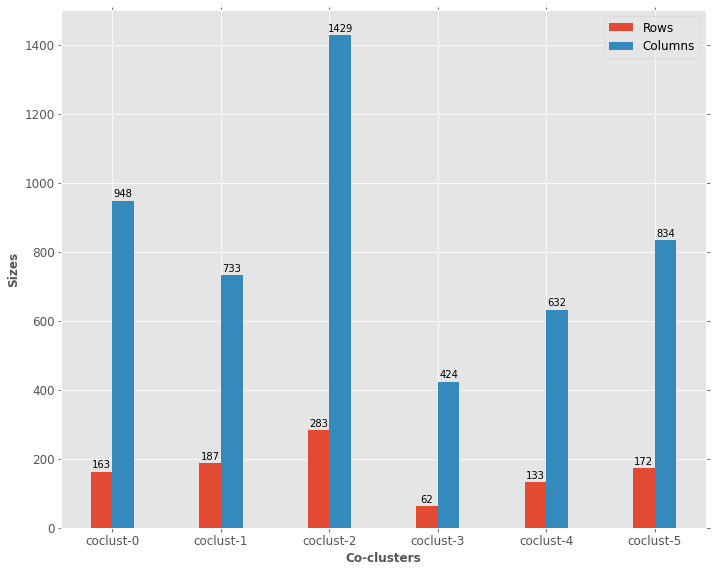

In [ ]:
model_mod = CoclustMod(n_clusters = n_cluster, random_state = 0) 
model_mod.fit(data_matrix)
plot_cluster_sizes(model_mod)

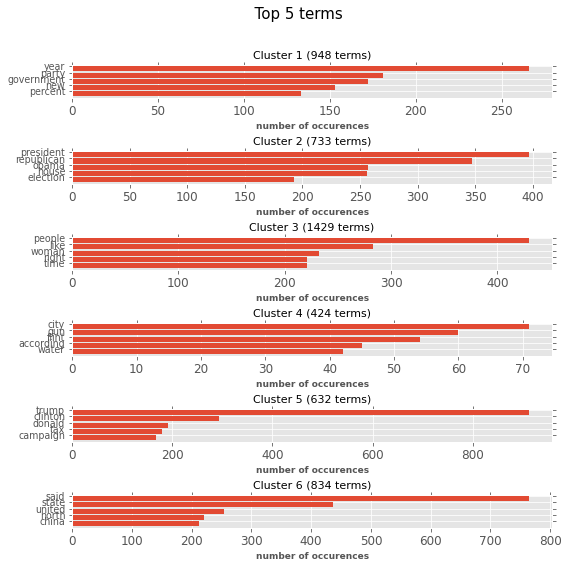

In [ ]:
plot_cluster_top_terms(data_matrix,words,5,model_mod)

## **TF IDF**

In [ ]:
data_matrix = embedding_tfidf

### ***LDA***

In [ ]:
number_of_topics = 8

lda_model = LatentDirichletAllocation( n_components=number_of_topics, 
                                      learning_method='online', 
                                      random_state=20,  
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_matrix)

In [ ]:
for i,topic in enumerate(lda_model.components_):
  print(f'Top 10 words for topic #{i+1}:')
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
  print('\n')

Top 10 words for topic #1:
['would', 'president', 'clinton', 'republican', 'people', 'tax', 'rico', 'said', 'puerto', 'trump']


Top 10 words for topic #2:
['penthouse', 'million', 'salma', 'donor', 'nazi', 'bush', 'arkema', 'hayek', 'trump', 'upsetting']


Top 10 words for topic #3:
['year', 'south', 'state', 'student', 'school', 'korea', 'said', 'china', 'flint', 'water']


Top 10 words for topic #4:
['spain', 'srinivasan', 'fl', 'hezbollah', 'fairooz', 'kushner', 'trump', 'supreme', 'lebanon', 'said']


Top 10 words for topic #5:
['britain', 'border', 'election', 'percent', 'said', 'intends', 'designate', 'philip', 'miscimarra', 'nlrb']


Top 10 words for topic #6:
['yiannopoulos', 'vp', 'said', 'bronx', 'britain', 'cuomo', 'toomey', 'tax', 'trump', 'finished']


Top 10 words for topic #7:
['celebrate', 'campos', 'president', 'painting', 'trump', 'russian', 'group', 'said', 'obama', 'conyers']


Top 10 words for topic #8:
['year', 'people', 'obama', 'republican', 'would', 'clinton',

In [ ]:
topic_values = lda_model.transform(data_matrix)
df['Topic'] = topic_values.argmax(axis=1)
df

,original_tweets,cleaned_tweets,Topic
555,The general election hasn t even truly begun a...,general election even truly begun already dona...,7
822,MADRID (Reuters) - Spain s Supreme court has b...,madrid reuters spain supreme couhas begun proc...,7
3237,NAIROBI (Reuters) - A presidential election sc...,nairobi reuters presidential election schedule...,7
1093,(Reuters) - President Barack Obama on Monday u...,reuters president barack obama monday urged co...,7
4529,WASHINGTON (Reuters) - The U.S. Senate’s No. 2...,washington reuters u senate republican said mo...,7
...,...,...,...
399,"The acting Attorney General, Sally Yates, has ...",acting attorney general sally yates betrayed d...,7
798,TOKYO (Reuters) - Japanese Prime Minister Shin...,tokyo reuters japanese prime minister shinzo a...,7
4027,WASHINGTON (Reuters) - U.S. Secretary of State...,washington reuters u secretary state rex tille...,7
375,Protesters were out in large numbers on Michig...,protester large number michigan avenue today c...,7


In [ ]:
toto=df.drop(columns=["cleaned_tweets"])

path = '/content/drive/My Drive/lda_1000.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  toto.to_csv(f)

### ***NMF***

In [ ]:
number_of_topics = 8

model = NMF(n_components=number_of_topics, random_state=5)
output = model.fit(data_matrix)
features = model.transform(data_matrix)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [ ]:
for i,topic in enumerate(model.components_):
  print(f'Top 10 words for topic #{i+1}:')
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
  print('\n')

Top 10 words for topic #1:
['life', 'water', 'police', 'right', 'one', 'like', 'black', 'student', 'woman', 'people']


Top 10 words for topic #2:
['tillerson', 'sanction', 'missile', 'pyongyang', 'south', 'korean', 'china', 'nuclear', 'north', 'korea']


Top 10 words for topic #3:
['supporter', 'tweet', 'candidate', 'image', 'said', 'republican', 'campaign', 'president', 'donald', 'trump']


Top 10 words for topic #4:
['vote', 'would', 'healthcare', 'obamacare', 'said', 'house', 'senate', 'bill', 'tax', 'republican']


Top 10 words for topic #5:
['election', 'agency', 'comey', 'flynn', 'said', 'putin', 'moscow', 'intelligence', 'russia', 'russian']


Top 10 words for topic #6:
['poll', 'server', 'candidate', 'democratic', 'fbi', 'campaign', 'sander', 'email', 'hillary', 'clinton']


Top 10 words for topic #7:
['talk', 'brussels', 'party', 'minister', 'said', 'may', 'european', 'brexit', 'britain', 'eu']


Top 10 words for topic #8:
['security', 'refugee', 'government', 'syria', 'milit

In [ ]:
topic_values = model.transform(data_matrix)
df['Topic'] = topic_values.argmax(axis=1)
df

,original_tweets,cleaned_tweets,Topic
555,The general election hasn t even truly begun a...,general election even truly begun already dona...,2
822,MADRID (Reuters) - Spain s Supreme court has b...,madrid reuters spain supreme couhas begun proc...,6
3237,NAIROBI (Reuters) - A presidential election sc...,nairobi reuters presidential election schedule...,6
1093,(Reuters) - President Barack Obama on Monday u...,reuters president barack obama monday urged co...,3
4529,WASHINGTON (Reuters) - The U.S. Senate’s No. 2...,washington reuters u senate republican said mo...,3
...,...,...,...
399,"The acting Attorney General, Sally Yates, has ...",acting attorney general sally yates betrayed d...,3
798,TOKYO (Reuters) - Japanese Prime Minister Shin...,tokyo reuters japanese prime minister shinzo a...,2
4027,WASHINGTON (Reuters) - U.S. Secretary of State...,washington reuters u secretary state rex tille...,1
375,Protesters were out in large numbers on Michig...,protester large number michigan avenue today c...,0


In [ ]:
toto=df.drop(columns=["cleaned_tweets"])

path = '/content/drive/My Drive/nmf_1000.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  toto.to_csv(f)

### ***BTM***

In [ ]:
vec = TfidfVectorizer()
X = vec.fit_transform(corpus_bis).toarray()

vocab = np.array(vec.get_feature_names())
biterms = vec_to_biterms(X)
btm = oBTM(num_topics=8, V=vocab)

print("\n\n Train Online BTM ..")
for i in range(0, len(biterms), 200): # prozess chunk of 200 texts
        biterms_chunk = biterms[i:i + 200]
        btm.fit(biterms_chunk, iterations=100)
topics = btm.transform(biterms)




 Train Online BTM ..


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
print("\n\n Visualize Topics ..")
pyLDAvis.prepare(btm.phi_wz.T, topics, np.count_nonzero(X, axis=1), vocab, np.sum(X, axis=0))

In [ ]:
print("\n\n Topic coherence ..")
topic_summuary(btm.phi_wz.T, X, vocab, 10)

In [ ]:
df['Topic'] = topics.argmax(axis=1)
df

In [ ]:
toto=df.drop(columns=["cleaned_tweets"])

path = '/content/drive/My Drive/btm_1000.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  toto.to_csv(f)

In [ ]:
toto

### ***Coclustering***

In [ ]:
# get the best co-clustering over a range of cluster numbers
clusters_range = range(2, 6)
model, modularities = best_modularity_partition(data_matrix, clusters_range, n_rand_init=1)
plot_max_modularities(modularities, range(2, 10))

#to fix this just by removing the argument in coclust_mod.py. It's line 95.

Computing coclust modularity for a range of cluster numbers =
 2 ...


TypeError: ignored

In [ ]:
n_cluster = 8

In [ ]:
model_mod = CoclustMod(n_clusters = n_cluster, random_state = 0) 
model_mod.fit(data_matrix)
plot_cluster_sizes(model_mod)

In [ ]:
plot_cluster_top_terms(data_matrix,features,5,model_mod)

In [ ]:
model_spec = CoclustSpecMod(n_clusters = n_cluster, random_state = 0)
model_spec.fit(data_matrix)
plot_cluster_sizes(model_spec)

In [ ]:
plot_cluster_top_terms(data_matrix,features,5,model_spec)

# **Sentiment Analysis**

In [ ]:
from textblob import TextBlob

In [ ]:
analyser = SentimentIntensityAnalyzer()
sentiment = []
polarity=[]
polarity_bis=[]
subjectivity=[]

for t in df['cleaned_tweets']:
    # sentiment_dict contient plusieurs scores pout pos, neg, neu, et un score de -1 à 1.
    sentiment_dict = analyser.polarity_scores(t) 

    polarity.append(TextBlob(t).sentiment.polarity)
    polarity_bis.append(sentiment_dict['compound'])
    subjectivity.append(TextBlob(t).sentiment.subjectivity)



    # A partir du "compound" (composant score) on determine le sentiment
    if sentiment_dict['compound'] >= 0.05:
        sentiment.append("Positive")

    elif sentiment_dict['compound'] <= - 0.05:
        sentiment.append("Negative")

    else:
        sentiment.append("Neutral")

V2=[]
for x in polarity:
  if x<=-0.05:
    V2.append("Negative")
  elif x>=0.5:
    V2.append("Positive")
  else:
    V2.append("Neutral")


In [ ]:
# dataset englobant l'integralité
df_sentiment=df.copy()
df_sentiment['sentiments']=sentiment
df_sentiment['sentiment']=V2
df_sentiment['subjectivity']=["Objective" if x<=0.3 else "Subjective" for x in subjectivity]

In [ ]:
df_sentiment

,original_tweets,cleaned_tweets,Target,sentiments,sentiment,subjectivity
6197,LONDON (Reuters) - Britain and France are firm...,london reuters britain france firmly committed...,True,Positive,Negative,Objective
1139,Donald Trump has been called out by yet anothe...,donald trump called yet another foreign leader...,Fake,Positive,Neutral,Subjective
5817,"President Obama visited Jakarta, where the nor...",president obama visited jakarta normally staid...,Fake,Positive,Neutral,Subjective
2074,"NATIONAL HARBOR, Md./WASHINGTON (Reuters) - Pr...",national harbor md washington reuters presiden...,True,Positive,Neutral,Subjective
5845,"YE BAW KYA, Myanmar (Reuters) - Myanmar author...",ye baw kya myanmar reuters myanmar authority d...,True,Negative,Neutral,Subjective
...,...,...,...,...,...,...
2058,21st Century Wire says One thing is certain ab...,st century wire say one thing certain war syri...,Fake,Negative,Neutral,Subjective
3453,"Monica Crowley, conservative radio host, Fox N...",monica crowley conservative radio host fox new...,Fake,Positive,Neutral,Subjective
3913,HARARE (Reuters) - Zimbabwe s President Robert...,harare reuters zimbabwe president robemugabe c...,True,Positive,Neutral,Objective
2803,"Back in July, 21WIRE detailed the investigativ...",back july wire detailed investigative work bul...,Fake,Positive,Neutral,Objective


## Ne pas relancer

In [ ]:
toto=df.copy()
toto['sentiments']=sentiment

path = '/content/drive/My Drive/sentiments_V1_5000.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  toto.to_csv(f)

In [ ]:
toto=df.copy()

V2=[]
for x in polarity:
  if x<=-0.05:
    V2.append("Negative")
  elif x>=0.5:
    V2.append("Positive")
  else:
    V2.append("Neutral")

toto['sentiments']=V2

path = '/content/drive/My Drive/sentiments_V2F_5000.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  toto.to_csv(f)

In [ ]:
toto

,original_tweets,sentiments
1,"This story is absolutely horrific, but not sur...",Neutral
2,BEIRUT/PARIS (Reuters) - Hezbollah s leader sa...,Neutral
4,"In yet another morning rant, Donald Trump blam...",Neutral
5,JAKARTA (Reuters) - Indonesian police shot dea...,Neutral
6,Did you catch that? Information accidentally ...,Neutral
...,...,...
4995,Speaking at a press conference with visiting I...,Neutral
4996,"Well, I don t know. When you have pipe bombs ...",Negative
4997,Donald Trump campaign senior advisor Jack King...,Neutral
4998,(Corrects this August 1st story to show Tille...,Neutral


In [ ]:
toto=df.copy()
toto['subjectivity']=["Objective" if x<=0.3 else "Subjective" for x in subjectivity]

path = '/content/drive/My Drive/subjectivite_5000.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  toto.to_csv(f)

In [ ]:
toto

,original_tweets,subjectivity
1,"This story is absolutely horrific, but not sur...",Subjective
2,BEIRUT/PARIS (Reuters) - Hezbollah s leader sa...,Subjective
4,"In yet another morning rant, Donald Trump blam...",Subjective
5,JAKARTA (Reuters) - Indonesian police shot dea...,Subjective
6,Did you catch that? Information accidentally ...,Objective
...,...,...
4995,Speaking at a press conference with visiting I...,Subjective
4996,"Well, I don t know. When you have pipe bombs ...",Objective
4997,Donald Trump campaign senior advisor Jack King...,Subjective
4998,(Corrects this August 1st story to show Tille...,Subjective


# **Fake news detection**

## Modelling

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_sentiment['labels'] = labelencoder.fit_transform(df_sentiment['Target'])

In [ ]:
#70% train, 15% test, 15% validate
train_text, temp_text, train_labels, temp_labels = train_test_split(df_sentiment['original_tweets'], df_sentiment['labels'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df_sentiment['labels'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [ ]:
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
MAX_LENGHT = 15
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)


## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
# doit transformer les labels en numériques.
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
for param in bert.parameters():
    param.requires_grad = False
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [ ]:
model = BERT_Arch(bert)

In [ ]:
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-5)          # learning rate

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight('balanced', np.unique(train_labels), train_labels)

print("Class Weights:",class_weights)

Class Weights: [0.97222222 1.02941176]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1], y=4662    1
5656    0
5935    1
4100    1
43      0
       ..
2948    1
2073    1
6186    0
5670    1
4749    1
Name: labels, Length: 700, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [ ]:
weights= torch.tensor(class_weights,dtype=torch.float)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

In [ ]:
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r for r in batch]
    sent_id, mask, labels = batch
    #print(type(labels),type(mask),type(sent_id))
    #print(sent_id)
    # clear previously calculated gradients 
    model.zero_grad()        
    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      #elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [ ]:
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10

Evaluating...

Training Loss: 0.693
Validation Loss: 0.685

 Epoch 2 / 10

Evaluating...

Training Loss: 0.675
Validation Loss: 0.670

 Epoch 3 / 10

Evaluating...

Training Loss: 0.664
Validation Loss: 0.657

 Epoch 4 / 10

Evaluating...

Training Loss: 0.650
Validation Loss: 0.641

 Epoch 5 / 10

Evaluating...

Training Loss: 0.636
Validation Loss: 0.630

 Epoch 6 / 10

Evaluating...

Training Loss: 0.625
Validation Loss: 0.618

 Epoch 7 / 10

Evaluating...

Training Loss: 0.623
Validation Loss: 0.606

 Epoch 8 / 10

Evaluating...

Training Loss: 0.611
Validation Loss: 0.595

 Epoch 9 / 10

Evaluating...

Training Loss: 0.602
Validation Loss: 0.586

 Epoch 10 / 10

Evaluating...

Training Loss: 0.597
Validation Loss: 0.579


In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

In [ ]:
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78        77
           1       0.73      0.95      0.83        73

    accuracy                           0.81       150
   macro avg       0.83      0.81      0.80       150
weighted avg       0.83      0.81      0.80       150



## Result

In [ ]:
titi=df_sentiment.drop(columns=['cleaned_tweets', 'Target', 'sentiments', 'labels'])
titi.head(10)

,original_tweets,sentiment,subjectivity
6197,LONDON (Reuters) - Britain and France are firm...,Negative,Objective
1139,Donald Trump has been called out by yet anothe...,Neutral,Subjective
5817,"President Obama visited Jakarta, where the nor...",Neutral,Subjective
2074,"NATIONAL HARBOR, Md./WASHINGTON (Reuters) - Pr...",Neutral,Subjective
5845,"YE BAW KYA, Myanmar (Reuters) - Myanmar author...",Neutral,Subjective
1488,"ERBIL, Iraq (Reuters) - The Kurdistan Regional...",Neutral,Objective
3208,"If you pay attention to right-wing media, and ...",Neutral,Subjective
4508,"Since the shooting in Orlando, Donald Trump ha...",Neutral,Subjective
6206,LONDON (Reuters) - Prime Minister Theresa May ...,Negative,Objective
2519,The initial run of Megyn Kelly s Sunday newsma...,Negative,Subjective


In [ ]:
temp=["FAKE" if x==0 else "TRUE" for x in preds]
res = pd.DataFrame(list(zip(test_text, temp)),
               columns =['original_tweets', 'Fake News'])
res

,original_tweets,Fake News
0,(This Nov. 24 story has been refiled to corre...,FAKE
1,WASHINGTON (Reuters) - Some prominent Republic...,TRUE
2,BRUSSELS (Reuters) - The European Union is det...,TRUE
3,WASHINGTON (Reuters) - U.S. President Donald T...,TRUE
4,Donald Trump is finally dealing with the massi...,FAKE
...,...,...
145,(Reuters) - The campaign group Human Rights Wa...,TRUE
146,"According to The Hill, Democrat Senator Bob Ca...",TRUE
147,"DORAL, Fla. (Reuters) - U.S. Republican presi...",TRUE
148,CAIRO (Reuters) - Islamic State claimed respon...,TRUE


In [ ]:
toto=pd.merge(df_sentiment, res, on='original_tweets')

In [ ]:
result=pd.merge(toto, df1, on='original_tweets')

In [ ]:
result=result.drop(columns=['cleaned_tweets_y', 'labels'])

In [ ]:
result.head(2)

,original_tweets,cleaned_tweets_x,Target,sentiments,sentiment,subjectivity,Fake News,Topic
0,The initial run of Megyn Kelly s Sunday newsma...,initial run megyn kelly sunday newsmagazine sh...,Fake,Negative,Negative,Subjective,FAKE,3
1,White House Press Secretary Sean Spicer appear...,white house press secretary sean spicer appear...,Fake,Negative,Neutral,Objective,FAKE,5


In [ ]:
df2 = result.groupby(['Fake News','Topic'])['original_tweets'].count()
df2.to_frame()

original_tweets
Fake News Topic                 
FAKE      0                    1
          1                    1
          2                    3
          3                   37
          4                    5
          5                    9
TRUE      0                    4
          2                   12
          3                   20
          4                   44
          5                   14

In [ ]:
df4 = result.groupby(['Fake News','sentiments'])['original_tweets'].count()
df4.to_frame()

original_tweets
Fake News sentiments                 
FAKE      Negative                 31
          Positive                 25
TRUE      Negative                 42
          Neutral                   1
          Positive                 51

In [ ]:
df5 = result.groupby(['Fake News','subjectivity'])['original_tweets'].count()
df5.to_frame()

original_tweets
Fake News subjectivity                 
FAKE      Objective                   5
          Subjective                 51
TRUE      Objective                  16
          Subjective                 78

In [ ]:
df6 = result.groupby(['Fake News','Topic','sentiment', 'subjectivity'])['original_tweets'].count()
df6.to_frame()

original_tweets
Fake News Topic sentiment subjectivity                 
FAKE      0     Neutral   Objective                   1
          1     Neutral   Subjective                  1
          2     Negative  Subjective                  1
                Neutral   Subjective                  2
          3     Negative  Subjective                  6
                Neutral   Objective                   1
                          Subjective                 29
                Positive  Subjective                  1
          4     Neutral   Objective                   1
                          Subjective                  4
          5     Negative  Subjective                  1
                Neutral   Objective                   2
                          Subjective                  6
TRUE      0     Negative  Objective                   1
                          Subjective                  2
                Neutral   Objective                   1
          2     Neutral   Objective                   1
                          Subjective                 11
          3     Negative  Subjective                  2
                Neutral   Objective                   1
                          Subjective                 17
          4     Negative  Objective                   3
                          Subjective                  3
                Neutral   Objective                   6
                          Subjective                 32
          5     Neutral   Objective                   3
                          Subjective                 11

In [ ]:
temp=["FAKE" if x==0 else "TRUE" for x in preds]
res = pd.DataFrame(list(zip(test_text, temp)),
               columns =['original_tweets', 'Fake News'])
path = '/content/drive/My Drive/fake_newsV2.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  res.to_csv(f)

## fake news study :

### fake news with word cloud :

In [ ]:
fake_data.isna().sum()
df['cleaned_fake_data']=fake_data.text.apply(lambda x: clean_text(x, punctuation, stop_words))

In [ ]:
df['cleaned_fake_data']

0      donald trump wish american happy new year leav...
1      house intelligence committee chairman devin nu...
2      friday revealed former milwaukee sheriff david...
3      christmas day donald trump announced would bac...
4      pope francis used annual christmas day message...
                             ...                        
745    official donald trump losing republican suppoi...
746    donald trump continuing effoto derail investig...
747    donald trump desperate distract everyone keepi...
748    trump continued attack fake news medium monday...
749    monday night donald trump traveled west virgin...
Name: cleaned_fake_data, Length: 750, dtype: object

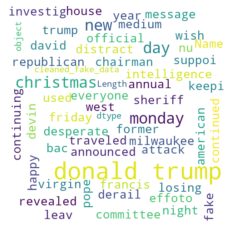

In [ ]:
wordcloud = WordCloud(background_color = 'white', width=480, height=480, margin=0).generate(str(df['cleaned_fake_data']))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

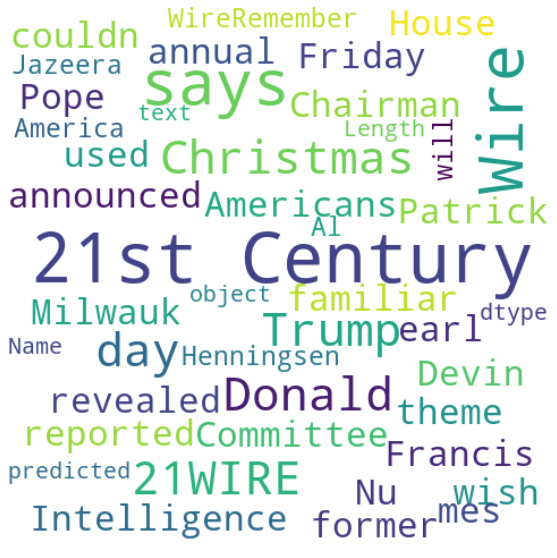

In [ ]:
wordcloud = WordCloud(background_color = 'white', width=480, height=480, margin=0).generate(str(fake_data['text']))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

D'apres l'application du wordcloud nous constatons qu'il y a pas des mots non communs pour les fake news sauf quelques fautes d'orthographes " comme keepi, suppoi, investighouse, sheriff" qui peuvent être vues comme un déclencher de fake news car si on veux publier un communiquer ou une information véredique la moindre des choses c'est de l'écrire correctement.
Nous pouvons voir aussi que si on laisse les données tel quelles sont 
nous trouvons d'autres mots qui interagissent, parcontre le word cloud ne donne pas une résultat qui pourra aider la détection des fake news.
en conclusion nous pourrons dire que les fake news peuvent etre detecter en se basant sur l'orthographe " en l'ajoutant comme parametre".

In [ ]:
df['cleaned_true_data']=true_data.text.apply(lambda x: clean_text(x, punctuation, stop_words))

In [ ]:
df['cleaned_true_data']

0      washington reuters head conservative republica...
1      washington reuters transgender people allowed ...
2      washington reuters special counsel investigati...
3      washington reuters trump campaign adviser geor...
4      seattle washington reuters president donald tr...
                             ...                        
745    washington reuters congressional budget office...
746    washington reuters u congressional budget offi...
747    reuters maine governor paul lepage said wednes...
748    washington reuters u senate committee wednesda...
749    washington reuters democratic u senator michig...
Name: cleaned_true_data, Length: 750, dtype: object

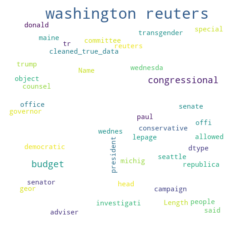

In [ ]:
wordcloud = WordCloud(background_color = 'white', width=480, height=480, margin=0).generate(str(df['cleaned_true_data']))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### fake news with topic modeling : 

la démarche que nous allons suivre est la suivante :       
Tout d'abord nous devons définir le nombre de cluster qui est donnée par le nombre de sujets traités.

#### Nombre de clusters :     

In [ ]:
fake_data = pd.read_csv('Fake.csv')
punctuation = r'''!()-[]{};:'"\,<>./?@#%^&*_”‘’“'''
stop_words = nltk.corpus.stopwords.words("english")


In [ ]:
fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
fake_data['cleaned_tweets']= fake_data['text'].apply(lambda x: clean_text(x, punctuation, stop_words))

In [ ]:
fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


En se basant sur le nombre de sujet traités nous trouvons qu'il y a 6 topics.

In [ ]:

print("cleaned : ",fake_data["cleaned_tweets"][0])
print("raw : ",fake_data["text"][0])

cleaned :  donald trump wish american happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year president angry pant tweeted great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year great year america donald j trump december trump tweet went welll expect kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbeswan december one like calvin december impeachment would make great year america also accept regaining control congress miranda yaver december hear talk include many people hate wonder hate alan sandoval december us word hater new year wish marlene december say happy new year ko

En comparant le text après le preprocessing nous trouvons que l aphrase a perdu son sens de ce fait nous trouvons que pour ce type d'analyse vaux mieux laisser le texte tel qu'il est.

In [ ]:
fake_data.dropna(subset = ["text"], inplace=True)
fake_data['text'] = fake_data['text'].astype(str)
#fake_data=fake_data.drop(columns=['Unnamed: 0'])

In [ ]:
df=fake_data.sample(n=1000, random_state=1234)
#corpus=[x.split() for x in df["cleaned_tweets"]]
corpus_bis_raw=[x for x in df["text"]]
#corpus_bis_cleaned=[x for x in df["cleaned_tweets"]]

In [ ]:
df["subject"].value_counts()

News               385
politics           301
left-news          182
Government News     68
US_News             40
Middle-east         24
Name: subject, dtype: int64

In [ ]:
#bag of words : 
vectorizer = CountVectorizer(
  analyzer='word',       
  min_df=3,# minimum required occurences of a word 
  stop_words='english',# remove stop words
  lowercase=True,# convert all words to lowercase
  token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
  max_features=5000,# max number of unique words
                            )
embedding_bow = vectorizer.fit_transform(df["text"])

In [ ]:
# tfidf

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus_bis_raw)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
embedding_tfidf = pd.DataFrame(denselist, columns=feature_names)

In [ ]:
def elbow(embedding, max_k):
  inertia = []
  K_range = range(1,max_k)
  for k in K_range:
    model = KMeans(n_clusters=k).fit(embedding)
    #model = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=0)
    inertia.append(model.inertia_)
  plt.plot(K_range, inertia)
  plt.xlabel('Nombre de clusters')
  plt.ylabel('Coût du modele')
  plt.figure(figsize=(500, 200), dpi=80)

#### LDA: 

In [ ]:
# bag of word : 
number_of_topics = 6

lda_model = LatentDirichletAllocation( n_components=number_of_topics, 
                                      learning_method='online', 
                                      random_state=20,  
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(embedding_bow)

array([[8.54058590e-01, 7.77056164e-04, 7.78267370e-04, 7.76253587e-04,
        1.42829941e-01, 7.79891189e-04],
       [1.22554074e-01, 1.03573926e-03, 1.03835658e-03, 8.73300631e-01,
        1.03599362e-03, 1.03520470e-03],
       [1.75388664e-03, 8.64388921e-02, 1.75148565e-03, 1.76503251e-03,
        5.13001836e-01, 3.95288867e-01],
       ...,
       [4.72037656e-01, 4.67270520e-01, 9.38643667e-04, 5.78793087e-02,
        9.37136022e-04, 9.36735415e-04],
       [2.85064657e-03, 2.84142122e-03, 2.80352990e-01, 5.61975990e-01,
        1.49138439e-01, 2.84051300e-03],
       [8.91203745e-01, 5.96180302e-04, 1.06408004e-01, 5.96031998e-04,
        5.98972987e-04, 5.97065920e-04]])

In [ ]:
for i,topic in enumerate(lda_model.components_):
  print(f'Top 10 words for topic #{i+1}:')
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
  print('\n')

Top 10 words for topic #1:
['time', 'police', 'republican', 'like', 'black', 'donald', 'just', 'people', 'said', 'trump']


Top 10 words for topic #2:
['said', 'body', 'abortion', 'join', 'jeb', 'radio', 'boiler', 'room', 'parenthood', 'planned']


Top 10 words for topic #3:
['federal', 'said', 'million', 'states', 'new', '2014', 'obama', 'government', '000', 'state']


Top 10 words for topic #4:
['wire', 'military', 'iraq', 'syria', 'media', 'islamic', 'news', 'muslim', 'border', 'said']


Top 10 words for topic #5:
['election', 'media', 'news', 'obama', 'donald', 'said', 'hillary', 'president', 'clinton', 'trump']


Top 10 words for topic #6:
['just', 'president', 'right', 'court', 'women', 'com', 'pic', 'twitter', 'people', 'trump']




#### Co-clustering:

In [ ]:
pip install "coclust[alldeps]"

In [ ]:
n_cluster = 6

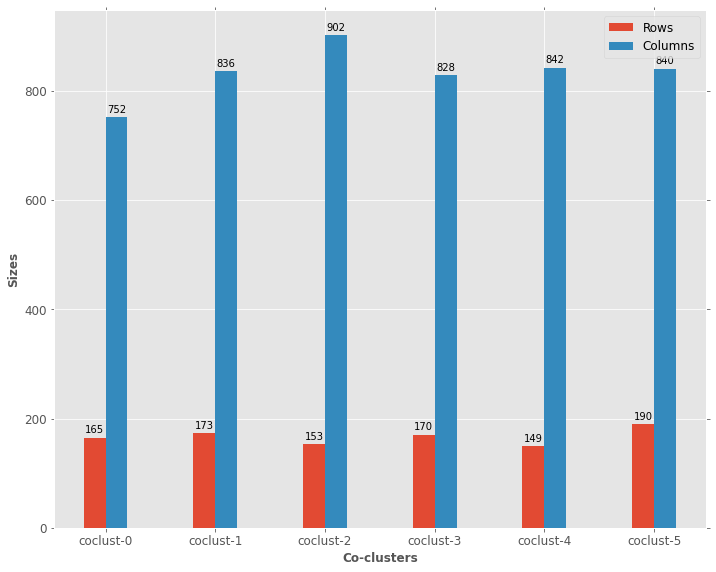

In [ ]:
model_mod = CoclustMod(n_clusters = n_cluster, random_state = 0) 
model_mod.fit(embedding_bow)
plot_cluster_sizes(model_mod)

In [ ]:
plot_cluster_top_terms(embedding_bow,words,5,model_mod)

# **Annexes**

**Dataset:**
* https://github.com/thepanacealab/covid19_twitter
* https://covid19research.site/geo-tagged_twitter_datasets/

**Prof:**
* https://wordnet.princeton.edu
* https://betterprogramming.pub/how-to-use-artificial-intelligence-and-twitter-to-detect-fake-news-a-python-tutorial-75a4132acf7f
* https://ieeexplore.ieee.org/document/8968706
* https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0250419
* https://soe.rutgers.edu/sites/default/files/imce/pdfs/GSET_2020___Detecting_Fake_News_FinalV2.pdf
* https://www.kaggle.com/code/hamditarek/fake-news-detection-on-twitter-eda/notebook

**Tech:**
*   Synonymes: https://www.tutorialspoint.com/how-to-get-synonyms-antonyms-from-nltk-wordnet-in-python#:~:text=The%20WordNet%20is%20a%20part,then%20download%20the%20WordNet%20package.

**Fake news:**
* https://link.springer.com/chapter/10.1007/978-3-030-71704-9_66
* https://github.com/sumeetkukreja92/Detecting-Fake-News
* https://ieeexplore.ieee.org/document/9457813
* https://www.kaggle.com/code/nupursh/nlp-in-r-topic-modelling-for-fake-news/notebook
* https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/
* https://towardsdatascience.com/fake-news-detection-with-machine-learning-using-python-3347d9899ad1
* https://medium.com/swlh/detecting-fake-news-with-python-and-machine-learning-f78421d29a06
* https://hal.inria.fr/hal-02274166/document



